In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
import scienceplots
from matplotlib.lines import Line2D

# Cargado de Datos

In [2]:
exps = ['exp1', 'exp2', 'exp3']
dfs = {}  # diccionario donde guardamos los DataFrames por experimento

for exp in exps:
    lista_dfs = []
    for generacion in range(49):
        ruta_archivo = f'resultados/{exp}/resultados_generacion_{generacion}.csv'
        if os.path.exists(ruta_archivo):
            datos = pd.read_csv(ruta_archivo)
            datos['generacion'] = generacion
            lista_dfs.append(datos)
        else:
            print(f'Archivo no encontrado: {ruta_archivo}')
            break
    
    # unir todos los de este experimento en un DataFrame
    dfs[exp] = pd.concat(lista_dfs, ignore_index=True)

# ahora accedés así:
df_exp1 = dfs['exp1']
df_exp2 = dfs['exp2']
df_exp3 = dfs['exp3']

Archivo no encontrado: resultados/exp1/resultados_generacion_45.csv
Archivo no encontrado: resultados/exp2/resultados_generacion_35.csv


In [3]:
df_exp1

,D,A,B,x,y,fitness,generacion
0,83.626976,0.000496,21.974182,416.0,496.0,0.845207,0
1,6.494542,0.000324,1.872564,515.0,503.0,1.323900,0
2,96.433609,0.000217,17.221539,385.0,574.0,0.537906,0
3,11.028158,0.000200,11.862853,454.0,554.0,0.749674,0
4,49.082073,0.000149,15.561389,491.0,560.0,0.876539,0
...,...,...,...,...,...,...,...
449995,22.506790,0.000072,10.722678,413.0,600.0,0.108308,44
449996,18.792696,0.000014,14.350608,413.0,607.0,0.252005,44
449997,22.800406,0.000113,11.636285,418.0,600.0,0.095067,44
449998,16.333033,0.000066,15.131789,410.0,595.0,0.048909,44


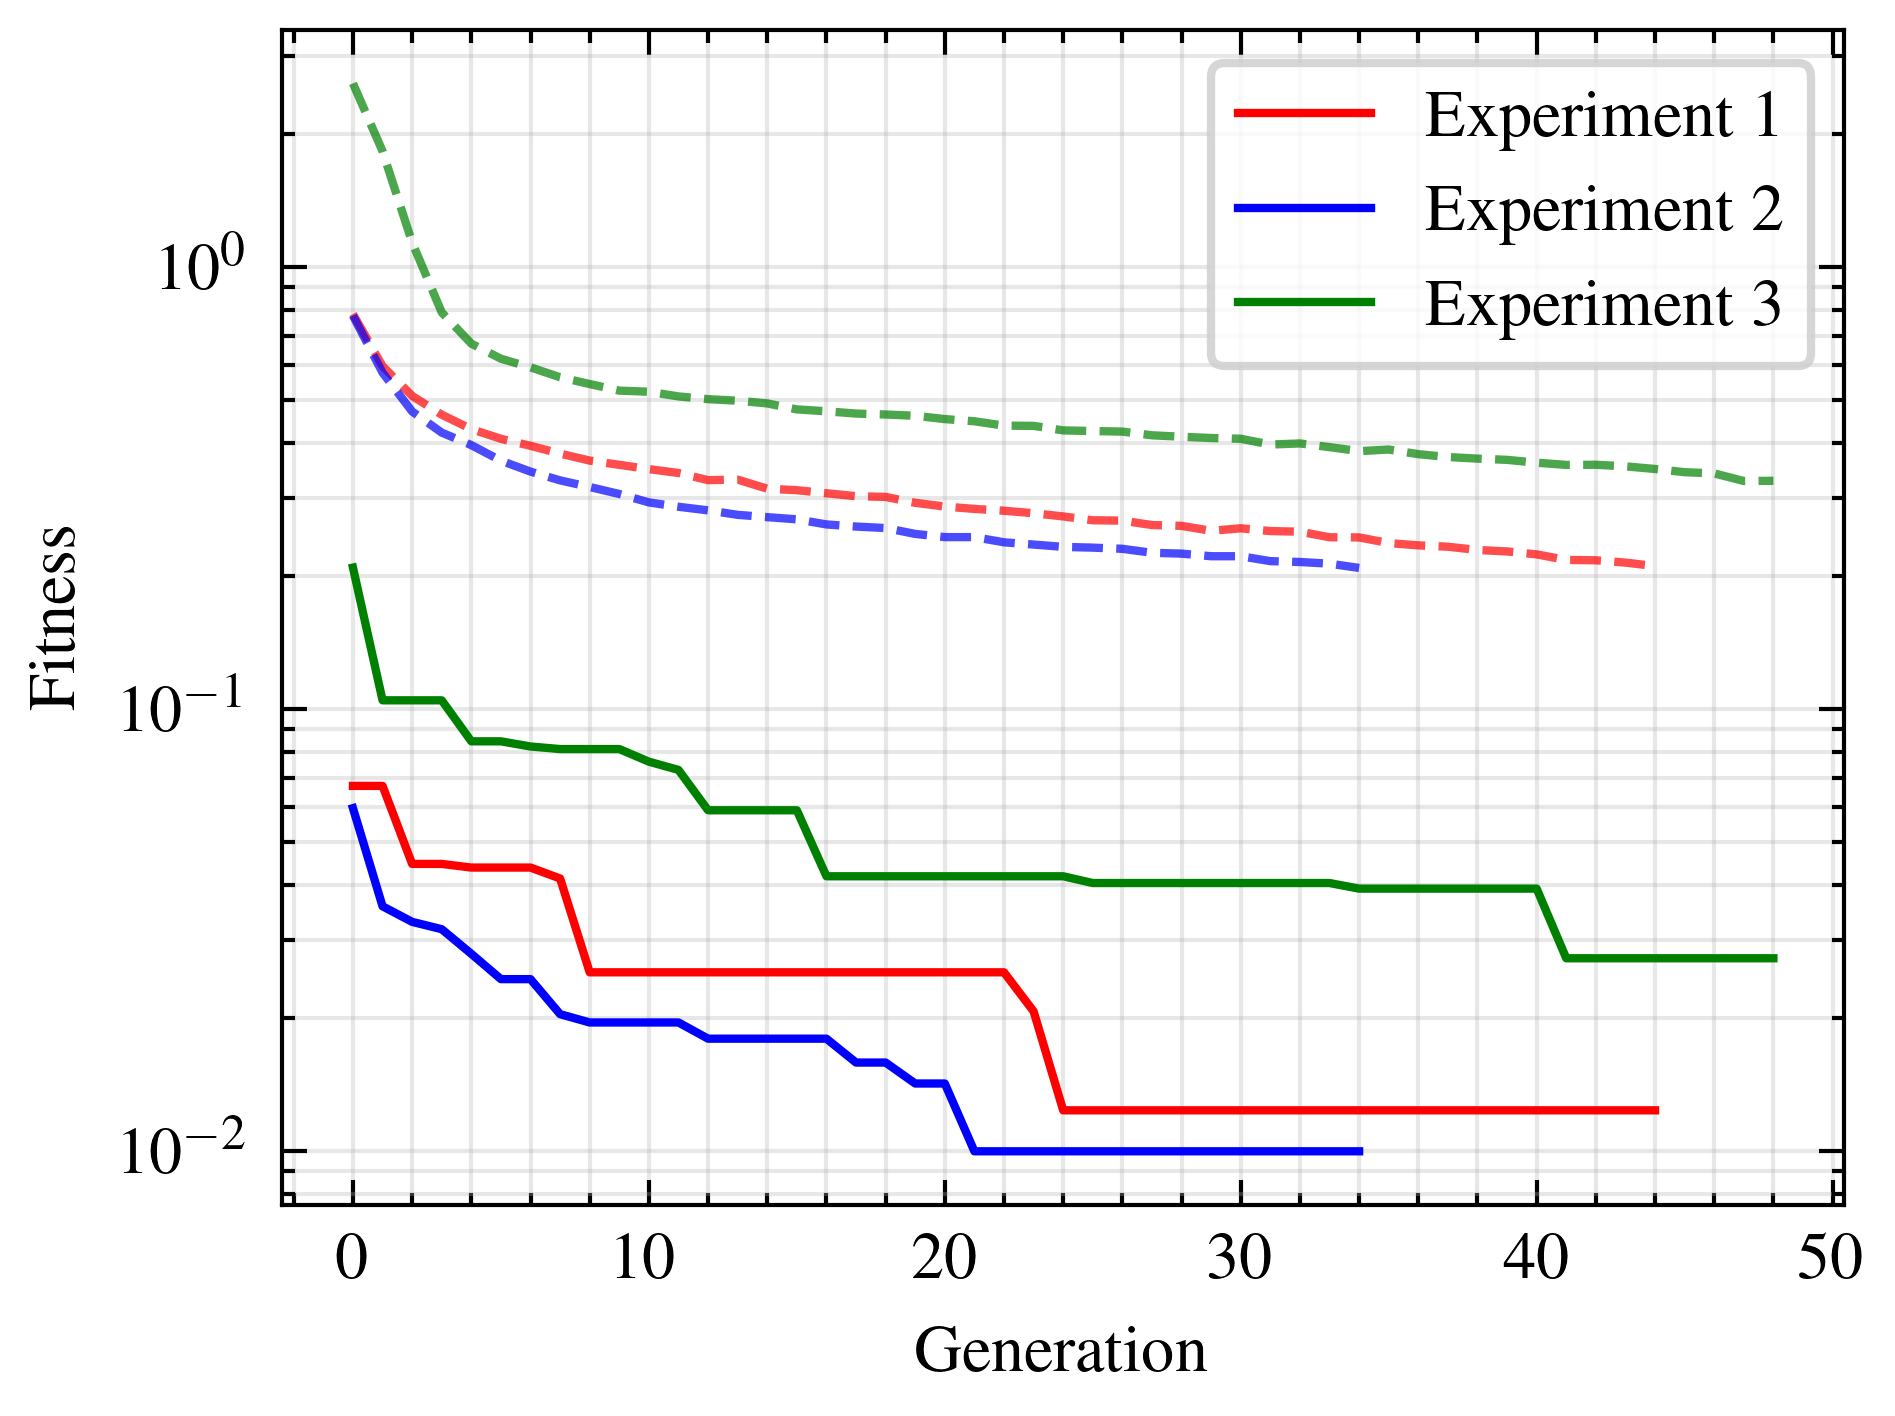

In [12]:
# Visualizaciones de los resultados del algoritmo genético

# Evolución del fitness a lo largo de las generaciones

# Experimento 1
mejor_fitness_exp1 = df_exp1.groupby('generacion')['fitness'].min()
fitness_promedio_exp1 = df_exp1.groupby('generacion')['fitness'].mean()

# Experimento 2
mejor_fitness_exp2 = df_exp2.groupby('generacion')['fitness'].min()
fitness_promedio_exp2 = df_exp2.groupby('generacion')['fitness'].mean()

# Experimento 3
mejor_fitness_exp3 = df_exp3.groupby('generacion')['fitness'].min()
fitness_promedio_exp3 = df_exp3.groupby('generacion')['fitness'].mean()

import matplotlib.ticker as ticker

with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots()
    plt.yscale('log')
    
    # Exp1
    ax.plot(mejor_fitness_exp1.index, mejor_fitness_exp1.values, '-', color='red')
    ax.plot(fitness_promedio_exp1.index, fitness_promedio_exp1.values, '--', color='red', alpha=0.7)

    # Exp2
    ax.plot(mejor_fitness_exp2.index, mejor_fitness_exp2.values, '-', color='blue')
    ax.plot(fitness_promedio_exp2.index, fitness_promedio_exp2.values, '--', color='blue', alpha=0.7)

    # Exp3
    ax.plot(mejor_fitness_exp3.index, mejor_fitness_exp3.values, '-', color='green')
    ax.plot(fitness_promedio_exp3.index, fitness_promedio_exp3.values, '--', color='green', alpha=0.7)

    # handles personalizados para la leyenda
    legend_elements = [
        Line2D([0], [0], color='red', lw=1, label='Experiment 1'),
        Line2D([0], [0], color='blue', lw=1, label='Experiment 2'),
        Line2D([0], [0], color='green', lw=1, label='Experiment 3'),
    ]
    ax.legend(handles=legend_elements, frameon=True, loc='best')
    
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')

    # más ticks en x (cada 5 generaciones, por ejemplo)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    # ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    # más ticks en y (en escala logarítmica)
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=range(1, 10)))
    
    ax.grid(True, which='both', alpha=0.3)  # activa grilla en ticks menores también
    plt.tight_layout()
    plt.savefig('fitness_evolution.pdf', dpi=600, bbox_inches='tight')
    plt.show()


## Experimento 1

En este experimento ajustamos los parámetros: $D$, $A$, $B$ y las coordenadas del punto de ignición $(x,y)$.

In [5]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_exp1.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "x", "y"
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   Punto de ignición: ({row['x']}, {row['y']})")
    print(f"   Fitness = {row['fitness']}")


🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#303672
   Generación: 30.0
   D = 10.324657440185549
   A = 9.344815771328284e-05
   B = 15.851767539978027
   Punto de ignición: (400.0, 599.0)
   Fitness = 0.012355464378963

#243169
   Generación: 24.0
   D = 11.099599838256836
   A = 0.0001035727909766
   B = 15.026252746582031
   Punto de ignición: (400.0, 603.0)
   Fitness = 0.0207012308839985

#325348
   Generación: 32.0
   D = 13.503010749816896
   A = 0.0001093767932616
   B = 14.915903091430664
   Punto de ignición: (402.0, 604.0)
   Fitness = 0.0223797090637821

#401540
   Generación: 40.0
   D = 11.77402114868164
   A = 0.0001120521992561
   B = 14.350607872009276
   Punto de ignición: (402.0, 603.0)
   Fitness = 0.0229858261842596

#390775
   Generación: 39.0
   D = 11.082801818847656
   A = 0.0001113939506467
   B = 13.31071949005127
   Punto de ignición: (402.0, 601.0)
   Fitness = 0.0230790749720253

#434894
   Generación: 43.0
   D = 15.188817977905272
   A = 7.19985764590092e-05
   

In [7]:
ultima_gen = df_exp1["generacion"].max()

df_ultima = df_exp1[df_exp1["generacion"] == ultima_gen].drop(columns=["generacion"])

df_ultima_sorted = df_ultima.sort_values("fitness", ascending=True)
df_ultima_topk = df_ultima_sorted.head(100)

df_ultima_topk


,D,A,B,x,y,fitness
447222,10.324657,0.000093,15.851768,400.0,599.0,0.012355
449690,14.788014,0.000085,14.657562,405.0,598.0,0.029187
441192,14.336059,0.000098,14.616663,404.0,604.0,0.030959
448225,10.541826,0.000067,15.749359,402.0,596.0,0.033197
445348,14.888514,0.000081,14.806870,402.0,596.0,0.033290
...,...,...,...,...,...,...
448686,18.176735,0.000080,13.841103,412.0,603.0,0.045366
448546,13.785458,0.000098,13.072571,401.0,598.0,0.045366
447180,19.963961,0.000084,13.766315,413.0,600.0,0.045412
443014,16.360117,0.000080,13.574222,408.0,595.0,0.045459


### Bootstrapping para darle un intervalo de confianza al mejor individuo

In [8]:
import cupy as cp

def bootstrap_confidence_intervals_df(df, param_cols, fitness_col='fitness', n_bootstrap=100, alpha=0.05):
    """
    Calcula intervalos de confianza para:
    - la media de los parámetros
    - los parámetros del mejor individuo (fitness mínimo)

    Args: 
        df: pandas.DataFrame con columnas de parámetros y fitness
        param_cols: lista con nombres de columnas de parámetros
        fitness_col: nombre d ela columna de fitness
        n_bootstrap: número de remuestreos
        alpha: nivel de significancia (0.05 -> IC 95%)
    
    Returns:
        dict con dos DataFrames:
            - mean_params_CI
            - best_params_CI
    """

    # Convertimos a cupy
    poblacion_params = cp.asarray(df[param_cols].values)
    poblacion_fitness = cp.asarray(df[fitness_col].values)

    N, d = poblacion_params.shape
    mean_params_samples = cp.zeros((n_bootstrap, d))
    best_params_samples = cp.zeros((n_bootstrap, d))

    rng = cp.random.default_rng()

    for i in range(n_bootstrap):
        idx = rng.integers(0, N, size=N)
        sample_params = poblacion_params[idx]
        sample_fitness = poblacion_fitness[idx]

        # media de parámetros
        mean_params_samples[i] = sample_params.mean(axis=0)

        # mejores parámetros
        best_idx = cp.argmin(sample_fitness)
        best_params_samples[i] = sample_params[best_idx]

    low_q = 100 * (alpha/2)
    high_q = 100 * (1 - alpha/2)

    mean_params_CI = cp.percentile(mean_params_samples, [low_q, high_q], axis=0)
    best_params_CI = cp.percentile(best_params_samples, [low_q, high_q], axis=0)

    mean_df = pd.DataFrame({
        "param": param_cols,
        "low": mean_params_CI[0].get(),
        "high": mean_params_CI[1].get()
    })

    best_df = pd.DataFrame({
        "param": param_cols,
        "low": best_params_CI[0].get(),
        "high": best_params_CI[1].get()
    })

    return {"mean_params_CI": mean_df, "best_params_CI": best_df}


res = bootstrap_confidence_intervals_df(df_ultima_topk, param_cols=["D", "A", "B", "x", "y"])

print("IC 95% de parámetros medios:\n", res["mean_params_CI"])
print("\nIC 95% de mejores parámetros:\n", res["best_params_CI"])

IC 95% de parámetros medios:
   param         low        high
0     D   16.690461   17.432822
1     A    0.000069    0.000075
2     B   14.184156   14.449465
3     x  407.929000  409.052000
4     y  596.464750  597.813000

IC 95% de mejores parámetros:
   param         low        high
0     D   10.324657   14.788014
1     A    0.000067    0.000098
2     B   14.616663   15.851768
3     x  400.000000  405.000000
4     y  596.000000  604.000000


### Análisis de la última generación

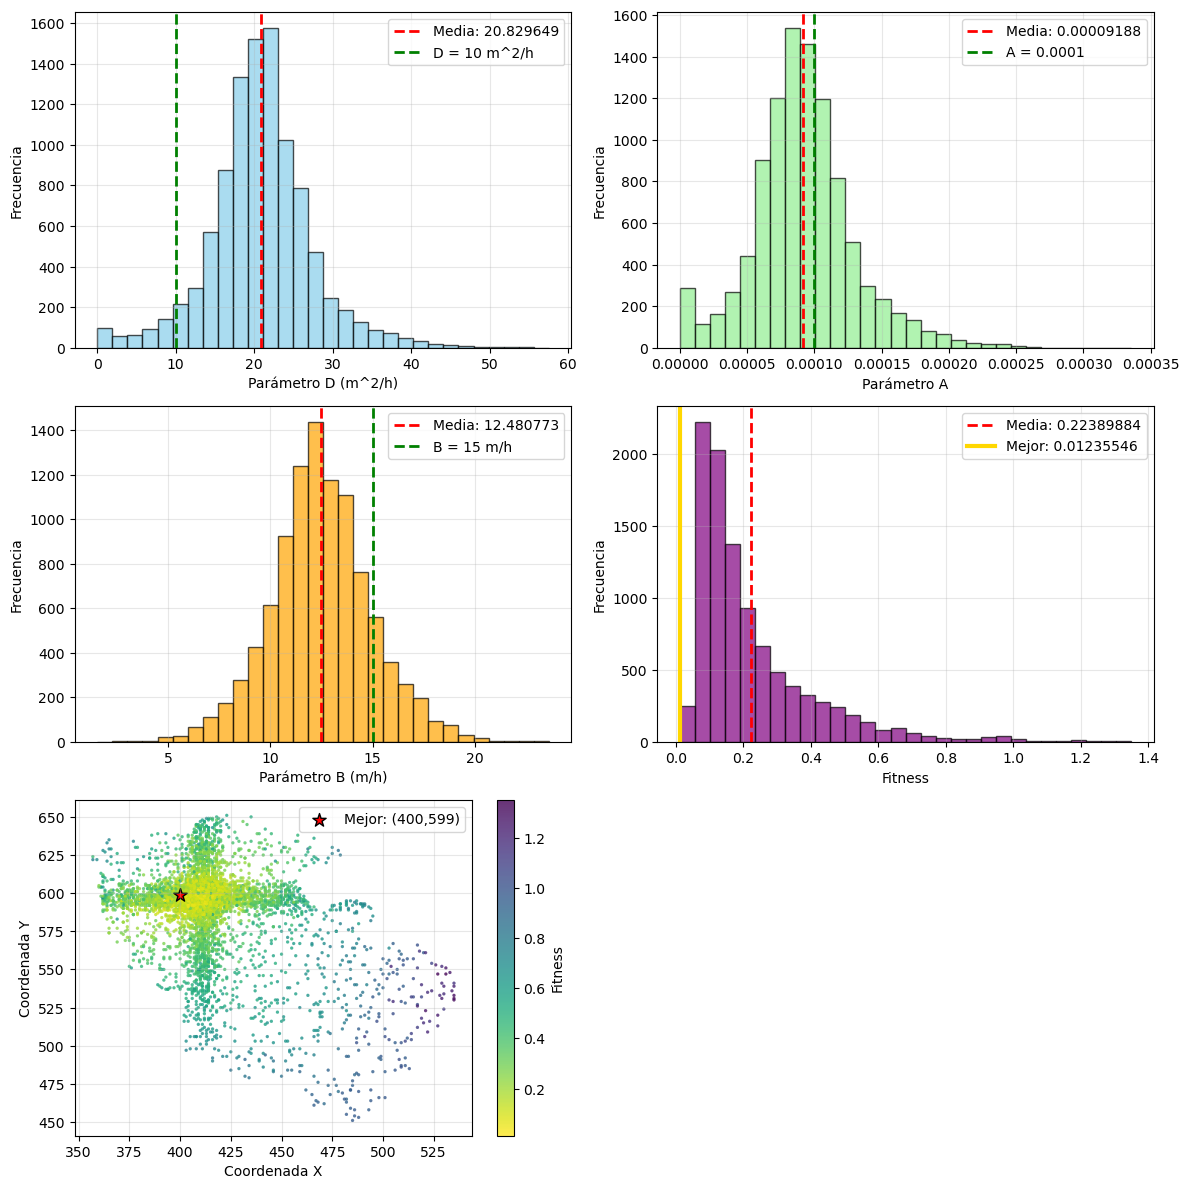

In [9]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_exp1['generacion'].max()
gen_ultima = df_exp1[df_exp1['generacion'] == ultima_generacion].copy()

# Crear figura con 3 filas y 2 columnas (6 ejes en total, usamos 5)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # pasar a lista simple para indexar fácilmente

n_bins = 30

# 1. Distribución del parámetro D
axes[0].hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
axes[0].axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
# axes[0].axvline(gen_ultima['D'].mean()-gen_ultima['D'].std(), color='blue', linestyle='--', linewidth=2)
# axes[0].axvline(gen_ultima['D'].mean()+gen_ultima['D'].std(), color='blue', linestyle='--', linewidth=2,
                #   label=f'Desviacion Estándar: {gen_ultima["D"].std():.6f}')
axes[0].set_xlabel('Parámetro D (m^2/h)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Distribución del parámetro A
axes[1].hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
axes[1].axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
axes[1].set_xlabel('Parámetro A')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Distribución del parámetro B
axes[2].hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[2].axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
axes[2].axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
axes[2].set_xlabel('Parámetro B (m/h)')
axes[2].set_ylabel('Frecuencia')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Distribución del fitness
axes[3].hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
axes[3].axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
axes[3].axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
axes[3].set_xlabel('Fitness')
axes[3].set_ylabel('Frecuencia')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

# 5. Puntos de ignición coloreados por fitness
scatter = axes[4].scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
axes[4].scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=100, marker='*', edgecolors='black', linewidth=1,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
axes[4].set_xlabel('Coordenada X')
axes[4].set_ylabel('Coordenada Y')
axes[4].legend()
axes[4].grid(True, alpha=0.3)
fig.colorbar(scatter, ax=axes[4], label='Fitness')

# Eliminar el subplot vacío (el sexto)
fig.delaxes(axes[5])

# Ajustar diseño
plt.tight_layout()
plt.savefig(f'resultados_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')
plt.show()

## Experimento 2

Ajustamos los parámetros $D$, $A$, $B$, $\beta$, $\gamma$ y las coordenadas del punto de ignición $(x,y)$. El terreno es homogéneo así que hay un solo tipo de combustible

In [6]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_exp2.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "x", "y",
        "beta", "gamma"
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   x = {row['x']}")
    print(f"   y = {row['y']}")
    print(f"   beta = {row['beta']}")
    print(f"   gamma = {row['gamma']}")
    print(f"   Fitness = {row['fitness']}")


🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#249819
   Generación: 24
   D = 22.733966827392575
   A = 0.000134453875944
   B = 15.831461906433104
   x = 399.0
   y = 604.0
   beta = [1.0283598]
   gamma = [0.27797645]
   Fitness = 0.0099804417855499

#232521
   Generación: 23
   D = 22.733966827392575
   A = 0.000134453875944
   B = 15.831461906433104
   x = 399.0
   y = 604.0
   beta = 1.0283598
   gamma = 0.27797645
   Fitness = 0.0099804417855499

#229631
   Generación: 22
   D = 29.004796981811523
   A = 9.05343476915732e-05
   B = 18.438161849975582
   x = 407.0
   y = 600.0
   beta = 1.3852967
   gamma = 0.7023464
   Fitness = 0.0140934192360791

#212710
   Generación: 21
   D = 37.001277923583984
   A = 0.0001507987617515
   B = 17.496341705322266
   x = 398.0
   y = 605.0
   beta = 1.5000511
   gamma = 0.8882019
   Fitness = 0.0142084675563736

#199919
   Generación: 19
   D = 37.001277923583984
   A = 0.0001507987617515
   B = 17.496341705322266
   x = 398.0
   y = 605.0
   beta = 1.5

### Análisis de la última Generación

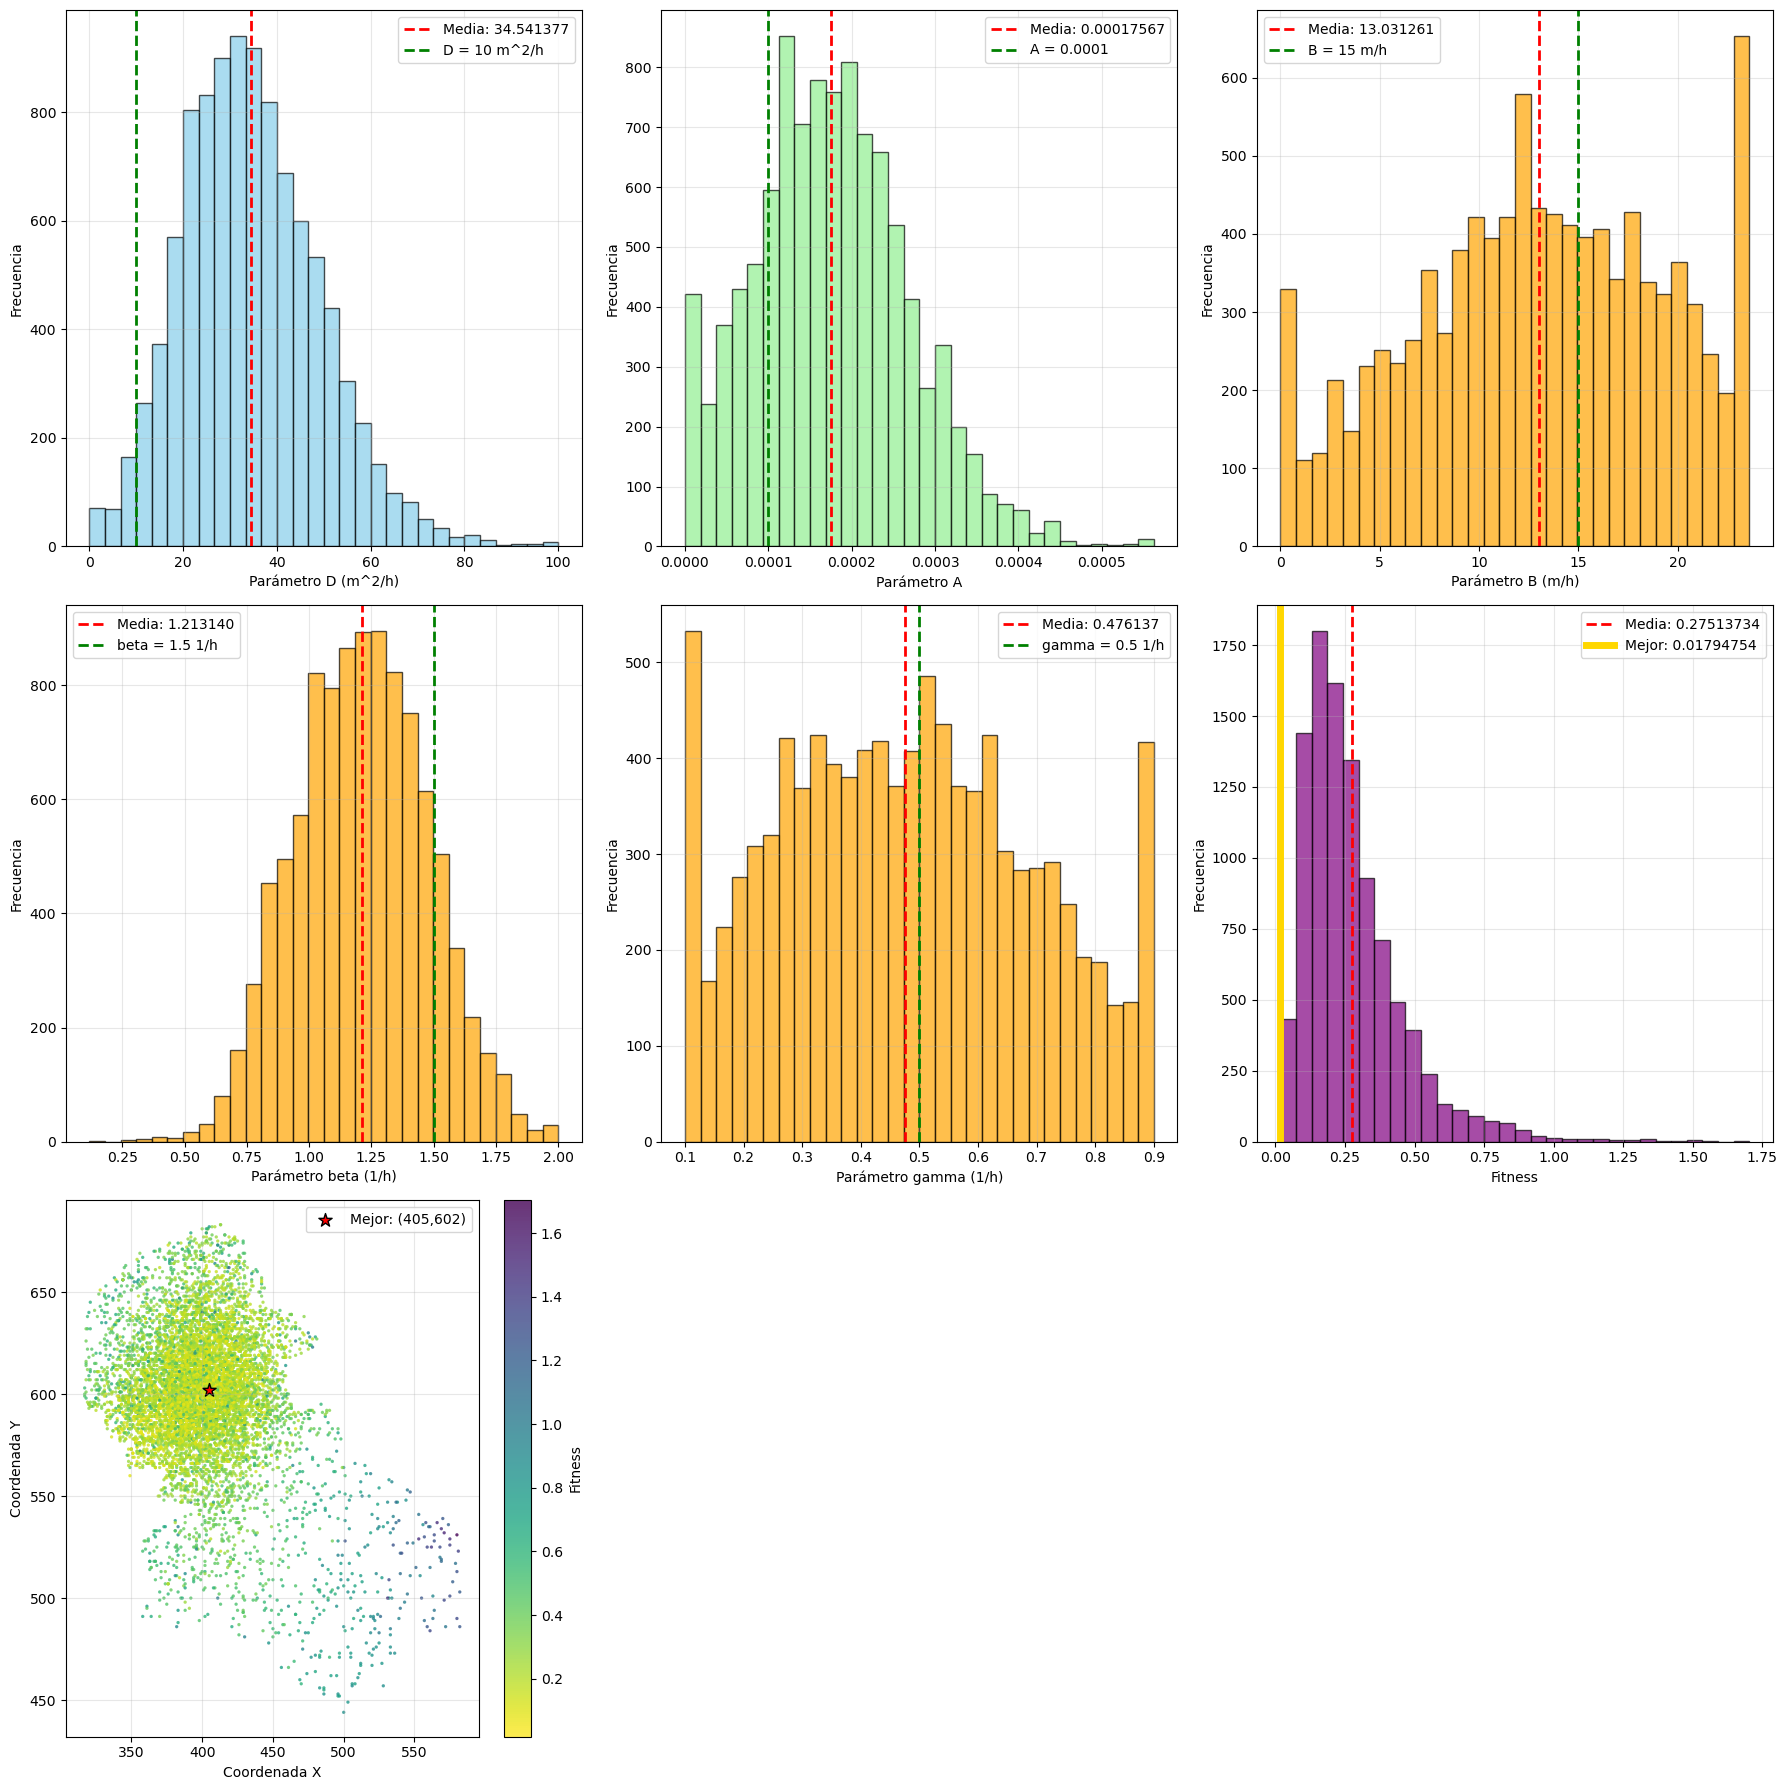

In [46]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_exp2['generacion'].max()
gen_ultima = df_exp2[df_exp2['generacion'] == ultima_generacion].copy()

# Crear figura con 3 filas y 3 columnas (6 ejes en total, usamos 5)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()  # pasar a lista simple para indexar fácilmente

n_bins = 30

# 1. Distribución del parámetro D
axes[0].hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
axes[0].axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
axes[0].set_xlabel('Parámetro D (m^2/h)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Distribución del parámetro A
axes[1].hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
axes[1].axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
axes[1].set_xlabel('Parámetro A')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Distribución del parámetro B
axes[2].hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[2].axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
axes[2].axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
axes[2].set_xlabel('Parámetro B (m/h)')
axes[2].set_ylabel('Frecuencia')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

axes[3].hist(gen_ultima['beta'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[3].axvline(gen_ultima['beta'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta"].mean():.6f}')
axes[3].axvline(1.5, color='green', linestyle='--', linewidth=2,
                 label=f'beta = {1.5} 1/h')
axes[3].set_xlabel('Parámetro beta (1/h)')
axes[3].set_ylabel('Frecuencia')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

axes[4].hist(gen_ultima['gamma'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[4].axvline(gen_ultima['gamma'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma"].mean():.6f}')
axes[4].axvline(0.5, color='green', linestyle='--', linewidth=2,
                 label=f'gamma = {0.5} 1/h')
axes[4].set_xlabel('Parámetro gamma (1/h)')
axes[4].set_ylabel('Frecuencia')
axes[4].legend()
axes[4].grid(True, alpha=0.3)

# 4. Distribución del fitness
axes[5].hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
axes[5].axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
axes[5].axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=5,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
axes[5].set_xlabel('Fitness')
axes[5].set_ylabel('Frecuencia')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

# 5. Puntos de ignición coloreados por fitness
scatter = axes[6].scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
axes[6].scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=100, marker='*', edgecolors='black', linewidth=1,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
axes[6].set_xlabel('Coordenada X')
axes[6].set_ylabel('Coordenada Y')
axes[6].legend()
axes[6].grid(True, alpha=0.3)
fig.colorbar(scatter, ax=axes[6], label='Fitness')

# Eliminar el subplot vacío (el sexto)
fig.delaxes(axes[7])
fig.delaxes(axes[8])

# Ajustar diseño
plt.tight_layout()
plt.savefig(f'resultados_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
plt.style.use(['science', 'ieee'])  # estilo global para todos los gráficos

n_bins = 30
ultima_generacion = df_exp2['generacion'].max()
gen_ultima = df_exp2[df_exp2['generacion'] == ultima_generacion].copy()

# 1. Distribución del parámetro D
with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots(figsize=(3.5, 3.0))  # tamaño típico de paper (en pulgadas)
    ax.hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
    ax.axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=1.2,
                  label=f'Mean: {gen_ultima["D"].mean():.6f}')
    ax.axvline(10, color='green', linestyle='--', linewidth=1.2,
                  label=f'D = {10} m$^2$/h')
    ax.set_xlabel(r'Parameter $D$ (m$^2$/h)')
    ax.set_ylabel('Frequence')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'distribucion_D_generacion_{ultima_generacion}.pdf', dpi=600, bbox_inches='tight')
    plt.close()

## Experimento 3

En este experimento generamos un multiincendio en 3 focos distintos y ajustamos los parámetros $D$, $A$, $B$, $\beta_i$, $\gamma_i$ para $i \in \{1, 2, 3, 4, 5\}$

In [8]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_exp3.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "beta_1", "beta_2", "beta_3", "beta_4", "beta_5",
        "gamma_1", "gamma_2", "gamma_3", "gamma_4", "gamma_5",
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   beta_1 = {row['beta_1']}")
    print(f"   beta_2 = {row['beta_2']}")
    print(f"   beta_3 = {row['beta_3']}")
    print(f"   beta_4 = {row['beta_4']}")
    print(f"   beta_5 = {row['beta_5']}")
    print(f"   gamma_1 = {row['gamma_1']}")
    print(f"   gamma_2 = {row['gamma_2']}")
    print(f"   gamma_3 = {row['gamma_3']}")
    print(f"   gamma_4 = {row['gamma_4']}")
    print(f"   gamma_5 = {row['gamma_5']}")
    print(f"   Fitness = {row['fitness']}")

# mejor_individuo = top10
# print(mejor_individuo)


🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#440394
   Generación: 44.0
   D = 16.7735595703125
   A = 0.0001077379201888
   B = 16.372913360595703
   beta_1 = 0.5802484
   beta_2 = 0.5303866
   beta_3 = 0.91939026
   beta_4 = 2.0
   beta_5 = 0.99104357
   gamma_1 = 0.24285705
   gamma_2 = 0.25270498
   gamma_3 = 0.40824017
   gamma_4 = 0.67380667
   gamma_5 = 0.5543178
   Fitness = 0.0272895248021983

#424210
   Generación: 42.0
   D = 14.356247901916504
   A = 0.0001058264606399
   B = 17.13526153564453
   beta_1 = 0.6648139
   beta_2 = 0.46021062
   beta_3 = 0.8953884
   beta_4 = 1.88827
   beta_5 = 0.72508085
   gamma_1 = 0.2818543
   gamma_2 = 0.15288818
   gamma_3 = 0.45215365
   gamma_4 = 0.47394556
   gamma_5 = 0.36988863
   Fitness = 0.0354384801250769

#341554
   Generación: 34.0
   D = 15.61675262451172
   A = 0.0001134612248279
   B = 17.793102264404297
   beta_1 = 0.7345374
   beta_2 = 0.6236912
   beta_3 = 1.023747
   beta_4 = 1.6858525
   beta_5 = 0.5373038
   gamma_1 = 0.4007553

## Análisis de la última generación
### Análisis específico de los mejores resultados obtenidos

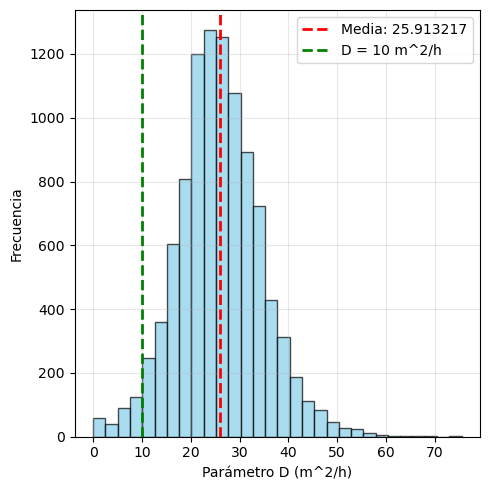

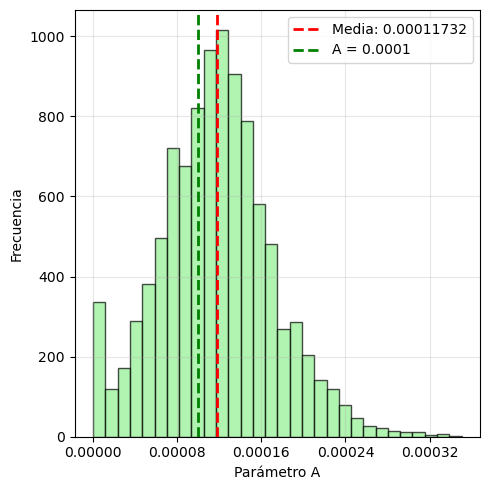

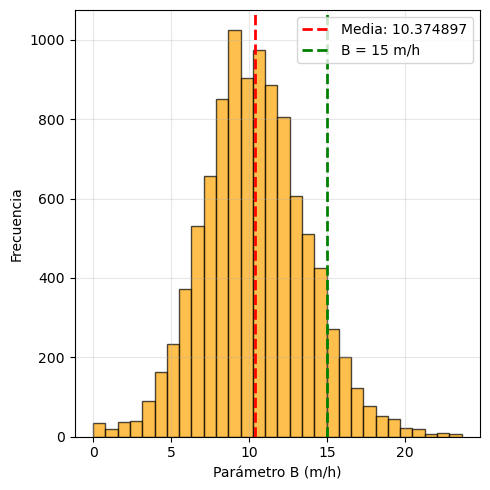

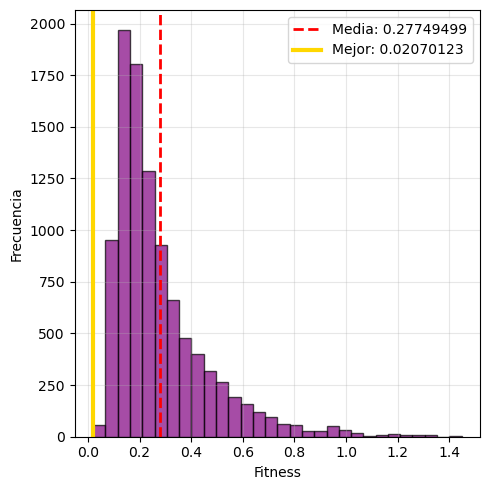

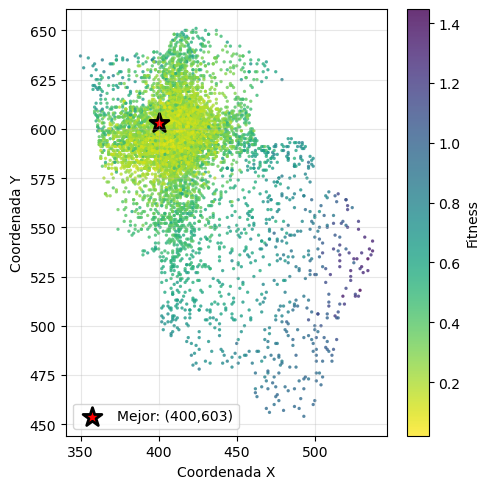

In [7]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_total['generacion'].max()
gen_ultima = df_total[df_total['generacion'] == ultima_generacion].copy()

n_bins = 30

# Seleccionar los mejores 1000 individuos de la última generación (fitness más pequeño)
# gen_ultima = gen_ultima.nsmallest(100, 'fitness')

# 1. Distribución del parámetro D en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
plt.axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
ax.set_xlabel('Parámetro D (m^2/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_D_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 2. Distribución del parámetro A en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
ticks = np.linspace(gen_ultima['A'].min(), gen_ultima['A'].max(), 6)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
plt.axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
plt.axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
ax.set_xlabel('Parámetro A')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_A_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 3. Distribución del parámetro B en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
plt.axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
ax.set_xlabel('Parámetro B (m/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_B_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_1'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_1"].mean():.6f}')
# plt.axvline(0.91, color='green', linestyle='--', linewidth=2,
#                  label=f'β1 = {0.91}')
# ax.set_xlabel('Parámetro β1')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_2'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_2"].mean():.6f}')
# plt.axvline(0.72, color='green', linestyle='--', linewidth=2,
#                  label=f'β2 = {0.72}')
# ax.set_xlabel('Parámetro β2')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_3'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_3"].mean():.6f}')
# plt.axvline(1.38, color='green', linestyle='--', linewidth=2,
#                  label=f'β3 = {1.38}')
# ax.set_xlabel('Parámetro β3')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_4'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_4"].mean():.6f}')
# plt.axvline(1.94, color='green', linestyle='--', linewidth=2,
#                  label=f'β4 = {1.94}')
# ax.set_xlabel('Parámetro β4')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_5'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_5"].mean():.6f}')
# plt.axvline(0.75, color='green', linestyle='--', linewidth=2,
#                  label=f'β5 = {0.75}')
# ax.set_xlabel('Parámetro β5')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_1'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_1"].mean():.6f}')
# plt.axvline(0.5, color='green', linestyle='--', linewidth=2,
#                  label=f'γ1 = {0.5}')
# ax.set_xlabel('Parámetro γ1')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_2'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_2"].mean():.6f}')
# plt.axvline(0.38, color='green', linestyle='--', linewidth=2,
#                  label=f'γ2 = {0.38}')
# ax.set_xlabel('Parámetro γ2')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_3'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_3"].mean():.6f}')
# plt.axvline(0.84, color='green', linestyle='--', linewidth=2,
#                  label=f'γ3 = {0.84}')
# ax.set_xlabel('Parámetro γ3')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_4'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_4"].mean():.6f}')
# plt.axvline(0.45, color='green', linestyle='--', linewidth=2,
#                  label=f'γ4 = {0.45}')
# ax.set_xlabel('Parámetro γ4')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_5'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_5"].mean():.6f}')
# plt.axvline(0.14, color='green', linestyle='--', linewidth=2,
#                  label=f'γ5 = {0.14}')
# ax.set_xlabel('Parámetro γ5')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 4. Distribución del fitness en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
plt.axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
ax.set_xlabel('Fitness')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_fitness_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 5. Puntos de ignición coloreados por fitness (última generación)
fig, ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
# Destacar el mejor individuo
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
plt.scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=200, marker='*', edgecolors='black', linewidth=2,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Fitness')
plt.tight_layout()
plt.savefig(f'distribucion_puntos_ignicion_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')